In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = tf.Variable([[0.4,0.2,0.4]])
W = tf.Variable([[-0.5,-0.2],
                [-0.3,0.4],
                [-0.5,0.2]])
b = tf.Variable([[0.1,0.2]])

XWb = tf.matmul(X,W)+b
y = tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:',sess.run(XWb))
    print('y:', sess.run(y))

('XWb:', array([[-0.35999998,  0.28      ]], dtype=float32))
('y:', array([[ 0.  ,  0.28]], dtype=float32))


In [4]:
#sigmoid激活函数
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([[-0.5,-0.2],
                [-0.3, 0.4],
                [-0.5, 0.2]])
b = tf.Variable([[0.1, 0.2]])

XWb = tf.matmul(X,W)+b

y = tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:',sess.run(XWb))
    print('y:', sess.run(y))

('XWb:', array([[-0.35999998,  0.28      ]], dtype=float32))
('y:', array([[ 0.41095957,  0.56954622]], dtype=float32))


In [5]:
#以正态分布的随机数生成权重与偏差的初始值
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([1,2]))
X = tf.Variable([[0.4,0.2,0.4]])
y = tf.nn.relu(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('b:', sess.run(b))
    print('W:', sess.run(W))
    print('y:', sess.run(y))

('b:', array([[ 0.19723237, -0.57399565]], dtype=float32))
('W:', array([[-0.49489957,  0.17356798],
       [ 0.31766674,  1.12940657],
       [ 0.32945701, -0.81234473]], dtype=float32))
('y:', array([[ 0.19458871,  0.        ]], dtype=float32))


In [6]:
#正态分布随机数
ts_norm = tf.random_normal([1000])

with tf.Session() as session:
    norm_data = ts_norm.eval()
    
print(norm_data[:5])

[ 1.9808203   1.64421785 -0.48781005  0.67302376 -0.52207488]


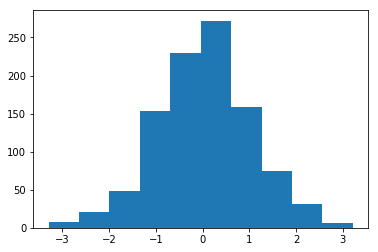

In [8]:
plt.hist(norm_data)
plt.show()

## 以placeholder传入X值

In [11]:
W = tf.Variable(tf.random_normal([3,2]))
h = tf.Variable(tf.random_normal([1,2]))
X = tf.placeholder('float', [None,3])
y = tf.nn.relu(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4]])
    (_b, _W, _X, _y) = sess.run((b,W,X,y), feed_dict={X:X_array})
    print('b:');print(_b)
    print('_W:');print(_W)
    print('_X:');print(_X)
    print('_y:');print(_y)

b:
[[ 0.75621879 -0.17452425]]
_W:
[[ 0.11709695  1.3866986 ]
 [ 0.22174695  0.26039377]
 [ 0.68829119  0.92647582]]
_X:
[[ 0.40000001  0.2         0.40000001]]
_y:
[[ 1.12272346  0.80282432]]


## 创建Layer函数以矩阵运算仿真神经网络

In [12]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [13]:
X = tf.placeholder('float', [None, 4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y) =  sess.run((X,h,y), feed_dict={X:X_array})
    
    print('input layer X:');print(layer_X)
    print('hidden layer h:');print(layer_h)
    print('output layer y:');print(layer_y)

input layer X:
[[ 0.40000001  0.2         0.40000001  0.5       ]]
hidden layer h:
[[ 0.          0.          0.18070343]]
output layer y:
[[ 1.7026571   0.20206237]]


## 建立layer_debug函数显示权重与偏差

In [14]:
def layer_debug(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs, W, b

In [16]:
X = tf.placeholder('float', [None, 4])
h,W1,b1 = layer_debug(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y,W2,b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y,W1,b1,W2,b2) =  sess.run((X,h,y,W1,b1,W2,b2), feed_dict={X:X_array})
    
    print('input layer X:');print(layer_X)
    print('W1:');print(W1)
    print('b1:');print(b1)
    print('hidden layer h:');print(layer_h)
    print('W2:');print(W2)
    print('b2:');print(b2)
    print('output layer y:');print(layer_y)

input layer X:
[[ 0.40000001  0.2         0.40000001  0.5       ]]
W1:
[[-1.84562612 -0.39592779 -1.80490005]
 [-0.83943081 -1.34275281  0.04058271]
 [-0.61014766  0.38935891 -0.40449473]
 [ 0.42494005 -0.72122079 -0.58483118]]
b1:
[[ 2.89507127 -1.79414451  0.63702327]]
hidden layer h:
[[ 1.9573456  0.         0.       ]]
W2:
[[ 0.63538241  0.46541041]
 [-0.07047886 -1.10237646]
 [ 0.39096537 -0.66185409]]
b2:
[[ 0.3583056  -2.00548649]]
output layer y:
[[ 1.60196853 -1.09451747]]
